In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# For the beginning, lets read the dataset "Flipkart_E_Commerce_Review.txt" file
# which have been uploaded into the Google collaboratory path where the script has saved into the collab window to begin
# with the text mining and later the sentimental analysis:

flipkart_e_commerce_review_list = pd.read_csv("Flipkart_E_Commerce_Review.txt", sep = "\t", header = None)

# Assigning the column names for the dataset to make it easier to reference and work later
flipkart_e_commerce_review_list.columns = ["Product_Name", "Price", "Rate", "Review", "Summary"]

# So as to display the first few rows of the DataFrame
flipkart_e_commerce_review_list.head()

,Product_Name,Price,Rate,Review,Summary
0,ProductName,Price,Rate,Review,Summary
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go..."
2,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Worth the money,Best laptop under 60kNo heat generation on gen...
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Delightful,"Overall the product is quiet good , display is..."
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Really Nice,Definitely the best if your budget is under 55...


In [4]:
# Removing the first row from the DataFrame
flipkart_e_commerce_review_list = flipkart_e_commerce_review_list.drop(0)

# Displaying the first few rows of the updated DataFrame
flipkart_e_commerce_review_list.head()


,Product_Name,Price,Rate,Review,Summary
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go..."
2,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Worth the money,Best laptop under 60kNo heat generation on gen...
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Delightful,"Overall the product is quiet good , display is..."
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Really Nice,Definitely the best if your budget is under 55...
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,One of the best Laptop for Under 60KPerformanc...


In [5]:
#In order to get the count of the rest of the features according to the rating for initial exploration we can use the below written code
print("\n Data Labels with the count based on the rating:")
print(flipkart_e_commerce_review_list.groupby("Rate").count())


 Data Labels with the count based on the rating:
      Product_Name  Price  Review  Summary
Rate                                      
1              192    192     192      192
2               60     60      60       60
3              183    183     183      183
4              611    611     611      611
5             1777   1777    1777     1777


In [6]:
stop_words = nltk.corpus.stopwords.words('english') #defined the stop_words variable by using NLTK's
# built-in English stop words. This variable now contains a list of common English words that are often
# considered as stopwords in text analysis.

#In order to apply the various preprocessing steps into our dataset to make it even analysis- friendly,
# we need to implement a few steps

def preprocessed_text(text_data):
  # Tokenize the text data using a regular expression pattern
  tokenized_document_values = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text_data)
  #This uses a regular expression pattern to tokenize the input text. It extracts words, numbers, and
  # apostrophes while ignoring other characters. Hence evaluated the tokenization pre-processing procedure

  # Remove stopwords and convert words to lowercase
  cleaned_token_values = [word.lower() for word in tokenized_document_values if word.lower() not in stop_words]
  #Remove stopwords from the tokenized_document_value

  # Apply stemming using Porter Stemmer
  stemmed_text_values = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_token_values]
  #this in turn do the stemming procedure in the pre-processing technology
  return stemmed_text_values

In [7]:
#apply the pre-processing function onto our dataset so as to get a cleaned dataset.
flipkart_e_commerce_review_list['Product_Name'] = flipkart_e_commerce_review_list['Product_Name'].astype(str).apply(preprocessed_text)
# Convert the 'Product_Name' column to string type before applying the function
flipkart_e_commerce_review_list['Review'] = flipkart_e_commerce_review_list['Review'].astype(str).apply(preprocessed_text)
# Convert the 'Review' column to string type before applying the function
flipkart_e_commerce_review_list['Summary'] = flipkart_e_commerce_review_list['Summary'].astype(str).apply(preprocessed_text)
# Convert the 'Summary' column to string type before applying the function
flipkart_e_commerce_review_list.head()

,Product_Name,Price,Rate,Review,Summary
1,"[asu, tuf, game, a17, 90whr, batteri, ryzen, 5...","63,990",5,[awesom],"[nice, laptop, game, experi, good, build, qual..."
2,"[asu, tuf, game, a17, 90whr, batteri, ryzen, 5...","63,990",4,"[worth, money]","[best, laptop, 60kno, heat, gener, gener, usag..."
3,"[asu, tuf, game, a17, 90whr, batteri, ryzen, 5...","63,990",4,[delight],"[overal, product, quiet, good, display, good, ..."
4,"[asu, tuf, game, a17, 90whr, batteri, ryzen, 5...","63,990",4,"[realli, nice]","[definit, best, budget, 55k, got, 52k, big, bi..."
5,"[asu, tuf, game, a17, 90whr, batteri, ryzen, 5...","63,990",5,[awesom],"[one, best, laptop, 60kperform, excel, find, l..."


In [ ]:
flipkart_e_commerce_product_name = flipkart_e_commerce_review_list.iloc[:, [0,2]]
#selecting specific columns from the DataFrame "flipkart_e_commerce_review_list" and
# creating a new DataFrame named "flipkart_e_commerce_product_name" containing only the "Product_Name" and "Summary" columns.

# Display the shapes of the resulting parts
display(flipkart_e_commerce_product_name)


,Product_Name,Rate
1,"['asu', 'tuf', 'game', 'a17', '90whr', 'batter...",5
2,"['asu', 'tuf', 'game', 'a17', '90whr', 'batter...",4
3,"['asu', 'tuf', 'game', 'a17', '90whr', 'batter...",4
4,"['asu', 'tuf', 'game', 'a17', '90whr', 'batter...",4
5,"['asu', 'tuf', 'game', 'a17', '90whr', 'batter...",5
...,...,...
2819,"['ngi', 'store', 'multipurpos', 'laptop', 'tab...",5
2820,"['ngi', 'store', 'multipurpos', 'laptop', 'tab...",3
2821,"['ngi', 'store', 'multipurpos', 'laptop', 'tab...",5
2822,"['ngi', 'store', 'multipurpos', 'laptop', 'tab...",3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #This is a scikit-learn class for converting a collection of text documents to a matrix of token counts.

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the 'Product_Name' column into a bag-of-words representation
vectorized_title = vectorizer.fit_transform(flipkart_e_commerce_product_name['Product_Name'].map(''.join))

# Convert the sparse matrix to a DataFrame
vectorized_title = pd.DataFrame(vectorized_title.toarray())

# Display the first few rows of the resulting DataFrame
vectorized_title.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
#scikit-learn's train_test_split function to split your data into training and testing sets for machine learning.

# stored the column feature "Rate" into a new variable called "target_value" (dependent variable)
target_value = flipkart_e_commerce_product_name['Rate']

# Split the data into training and testing sets
vectorized_title_train_value, vectorized_title_test_value, target_train_value, target_test_value = train_test_split(
    vectorized_title, # Features (independent variables)
    target_value, # Target variable (dependent variable)
    train_size = 0.75, # Proportion of the dataset to include in the training split
    test_size = 0.25, # Proportion of the dataset to include in the testing split
    random_state = 99 # Random seed for reproducibility
    )


<Axes: xlabel='Rate', ylabel='count'>

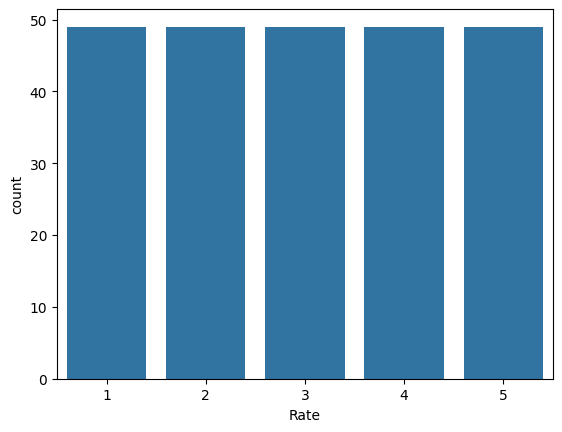

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#using the RandomUnderSampler from the imbalanced-learn library to address class imbalance by undersampling the majority class.

# Create a RandomUnderSampler instance
resampler = RandomUnderSampler(random_state = 0)

# Undersample the training data
vectorized_title_train_undersampled, target_train_undersampled = resampler.fit_resample(
    vectorized_title_train_value, # Features (bag-of-words representation)
    target_train_value # Target variable ("show_type")
    )

# Visualize the class distribution after undersampling
sns.countplot(x = target_train_undersampled)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#scikit-learn's MultinomialNB (Multinomial Naive Bayes) classifier to train a model on the undersampled training data.

# Create an instance of the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the undersampled training data
model.fit(vectorized_title_train_undersampled, target_train_undersampled)

# Optionally, creating another instance of the Multinomial Naive Bayes model (not necessary)
MultinomialNB()

MultinomialNB()

In [ ]:
# Make predictions on the test set
target_value_predict = model.predict(vectorized_title_test_value)

# Evaluate the model's performance
from sklearn import metrics

# Compute accuracy
accuracy = metrics.accuracy_score(target_test_value, target_value_predict)
print('Accuracy: %.2f\n\n' % (accuracy))
print("****************************************************************")

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(target_test_value, target_value_predict)
print("Confusion Matrix:\n")
print(confusion_matrix, '\n\n')

print("****************************************************************")

# Generate and print classification report
result = metrics.classification_report(target_test_value, target_value_predict)
print("Classification Report:\n")
print(result)

Accuracy: 0.18


****************************************************************
Confusion Matrix:

[[ 13  12  11   7   1]
 [  2   5   2   2   0]
 [  7   7  14   6   6]
 [ 28  33  53  51  15]
 [ 70  73 118 125  45]] 


****************************************************************
Classification Report:

              precision    recall  f1-score   support

           1       0.11      0.30      0.16        44
           2       0.04      0.45      0.07        11
           3       0.07      0.35      0.12        40
           4       0.27      0.28      0.27       180
           5       0.67      0.10      0.18       431

    accuracy                           0.18       706
   macro avg       0.23      0.30      0.16       706
weighted avg       0.49      0.18      0.20       706



In [ ]:
# For the beginning, lets read the dataset "Flipkart_E_Commerce_Review.txt" file which have been uploaded into the Google collaboratory
# path where the script has saved into the collab window to begin with the text mining and later the sentimental analysis:
flipkart_e_commerce_review_list = pd.read_csv("Flipkart_E_Commerce_Review.txt", sep = "\t", header = None)

# Assigning the column names for the dataset to make it easier to reference and work later
flipkart_e_commerce_review_list.columns = ["Product_Name", "Price", "Rate", "Review", "Summary"]

# So as to display the first few rows of the DataFrame
flipkart_e_commerce_review_list.head()

,Product_Name,Price,Rate,Review,Summary
0,ProductName,Price,Rate,Review,Summary
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go..."
2,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Worth the money,Best laptop under 60kNo heat generation on gen...
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Delightful,"Overall the product is quiet good , display is..."
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Really Nice,Definitely the best if your budget is under 55...


In [ ]:
# Removing the first row from the DataFrame
flipkart_e_commerce_review_list = flipkart_e_commerce_review_list.drop(0)

# Displaying the first few rows of the updated DataFrame
flipkart_e_commerce_review_list.head()


,Product_Name,Price,Rate,Review,Summary
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go..."
2,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Worth the money,Best laptop under 60kNo heat generation on gen...
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Delightful,"Overall the product is quiet good , display is..."
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Really Nice,Definitely the best if your budget is under 55...
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,One of the best Laptop for Under 60KPerformanc...


In [ ]:
flipkart_e_commerce_review_list.describe()
# provides a summary of statistical measures for each column in a DataFrame. It includes statistics such as count, unique, top, freq.

,Product_Name,Price,Rate,Review,Summary
count,2823,2823,2823,2823,2823
unique,18,16,5,86,2119
top,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"59,990",5,Wonderful,Good
freq,637,827,1777,155,82


In [ ]:
# using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from NLTK
# to analyze the sentiment of the "Summary" column in your flipkart_e_commerce_review_list DataFrame.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer instance
sentiment = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each storyline
flipkart_e_commerce_review_list['compound'] = [sentiment.polarity_scores(Summary)['compound'] for Summary in flipkart_e_commerce_review_list['Summary']]
flipkart_e_commerce_review_list['neg'] = [sentiment.polarity_scores(Summary)['neg'] for Summary in flipkart_e_commerce_review_list['Summary']]
flipkart_e_commerce_review_list['neu'] = [sentiment.polarity_scores(Summary)['neu'] for Summary in flipkart_e_commerce_review_list['Summary']]
flipkart_e_commerce_review_list['pos'] = [sentiment.polarity_scores(Summary)['pos'] for Summary in flipkart_e_commerce_review_list['Summary']]

In [ ]:
flipkart_e_commerce_review_list.head()
# display the first few rows of the DataFrame, including the original columns and the newly added sentiment analysis scores ('compound', 'neg', 'neu', 'pos').

,Product_Name,Price,Rate,Review,Summary,compound,neg,neu,pos
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go...",0.9061,0.000,0.737,0.263
2,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Worth the money,Best laptop under 60kNo heat generation on gen...,0.9161,0.056,0.728,0.216
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Delightful,"Overall the product is quiet good , display is...",0.8910,0.079,0.464,0.457
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",4,Really Nice,Definitely the best if your budget is under 55...,0.8014,0.075,0.758,0.168
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,One of the best Laptop for Under 60KPerformanc...,0.6907,0.030,0.852,0.118


In [ ]:
flipkart_e_commerce_review_list[['compound','neg','neu','pos']].describe()
# provide a summary of statistics for the specified columns ('compound', 'neg', 'neu', 'pos').

,compound,neg,neu,pos
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,0.430288,0.049709,0.564349,0.385939
std,0.416574,0.125443,0.278000,0.302505
min,-0.939300,0.000000,0.000000,0.000000
25%,0.266100,0.000000,0.375000,0.142500
50%,0.492700,0.000000,0.608000,0.320000
75%,0.725350,0.030500,0.773500,0.607000
max,0.987000,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

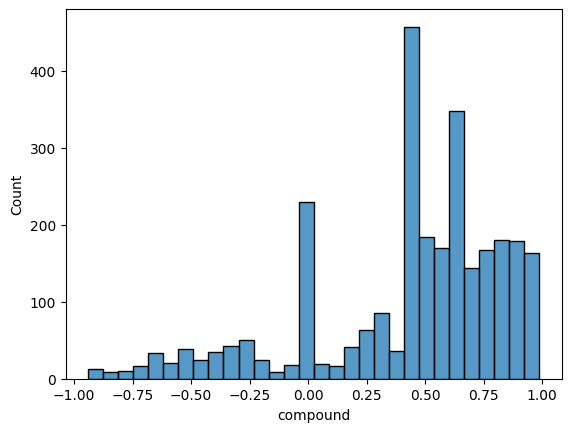

In [ ]:
sns.histplot(flipkart_e_commerce_review_list['compound'])
# Create a histogram of the 'compound' sentiment scores

In [ ]:
# Select only the numeric columns before calculating the median
flipkart_e_commerce_review_list[['compound','neg','neu','pos']].median()
# calculate and display the median values for each numerical column in the DataFrame.

,0
compound,0.4927
neg,0.0000
neu,0.6080
pos,0.3200


<Axes: xlabel='pos', ylabel='Count'>

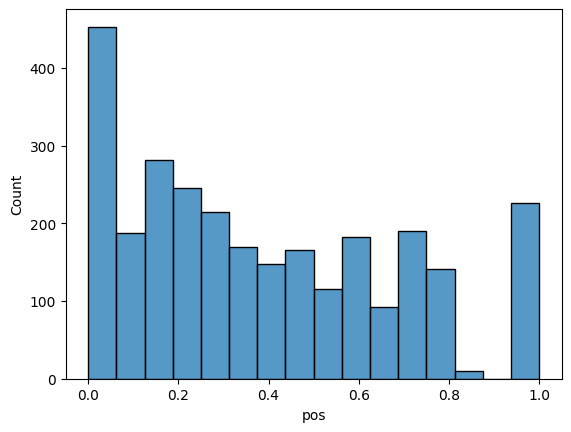

In [ ]:
sns.histplot(flipkart_e_commerce_review_list['pos'])
# Create a histogram of the 'pos' sentiment scores

<Axes: xlabel='neg', ylabel='Count'>

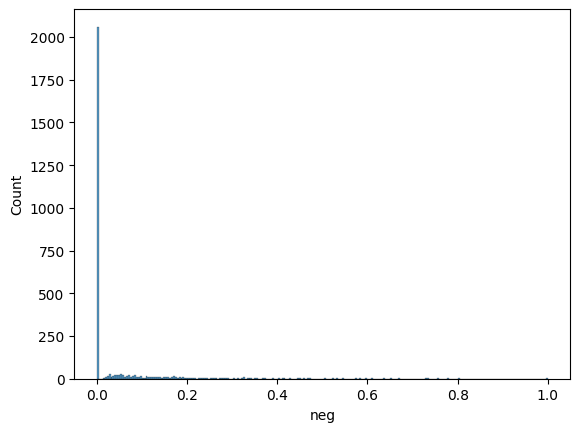

In [ ]:
sns.histplot(flipkart_e_commerce_review_list['neg'])
# using Seaborn's histplot function to create a histogram with specified bins and adding a kernel density estimate (KDE) to the plot.

In [ ]:
# since there is a neutral categorization based on the posiitve and negative Summary of the flipkart_e_commerce_review_list, we can find out how many negative Summary we have according to the Ratings

(flipkart_e_commerce_review_list['compound']<=0).groupby(flipkart_e_commerce_review_list['Rate']).sum()

,compound
Rate,
1,173
2,49
3,87
4,83
5,176


In [ ]:
#likewise we can also find out the negative storylines we have according to the "Product_Name" attribute

(flipkart_e_commerce_review_list['compound']<=0).groupby(flipkart_e_commerce_review_list['Product_Name']).sum()

,compound
Product_Name,
"ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5-4600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FA706IHRB-HX041W Gaming Laptop (17.3 Inch, Graphite Black, 2.60 Kg)",64
"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop (15.6 inch, Black Plastic, 2.30 kg kg)",70
"ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-EJ392WS Thin and Light Laptop (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)",59
"ASUS Vivobook Pro 15 Ryzen 7 Octa Core AMD R7-4800H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650 Max Q) M6500IH-HN702WS Creator Laptop (15.6 Inch, Cool Silver, 1.80 Kg, With MS Office)",12
Acnos Wood Portable Laptop Table (Finish Color - Pink),1
"HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop (14 inch, Natural Silver, 1.41 Kg, With MS Office)",21
"HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) 15-ec2004AX Gaming Laptop (15.6 inch, Shadow Black, 1.98 kg)",128
"HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) 15-EC2145AX Gaming Laptop (15.6 inch, Shadow Black & Ultra Violet, 1.98 kg)",2
"HP Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop (15.6 inch, Natural Silver, 1.69 kg, With MS Office)",11


In [ ]:
# hence, to compare and get an overall view, lets calculate the percentage of total Summary descriptions according to the "Product_Name" category

neg_summary_percent = pd.DataFrame((flipkart_e_commerce_review_list['compound']<=0).groupby(flipkart_e_commerce_review_list['Product_Name']).sum() #This calculates the count of negative Summary for each 'Product_Name'.
/flipkart_e_commerce_review_list['Product_Name'].groupby(flipkart_e_commerce_review_list['Product_Name']).count()*100, #This calculates the total count of Summary for each 'Product_Name'. and '/' performs element-wise division to calculate the percentage of negative Summary.
                                     columns = ['% negative summary']).sort_values(by = '% negative summary') #This sorts the DataFrame by the percentage of negative Summary.
# Changed 'Product_Name' to 'Product_Name' to match the actual column name in the DataFrame
neg_summary_percent

,% negative summary
Product_Name,
"HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) 15-EC2145AX Gaming Laptop (15.6 inch, Shadow Black & Ultra Violet, 1.98 kg)",5.882353
"MSI GF63 Thin Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650 Max-Q) GF63 Thin 11SC-1046IN Gaming Laptop (15.6 inch, Black, 1.86 kg)",8.108108
Acnos Wood Portable Laptop Table (Finish Color - Pink),10.000000
"HP Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop (15.6 inch, Natural Silver, 1.69 kg, With MS Office)",15.277778
"MSI Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce RTX 3050/144 Hz) GF63 Thin 11UC-867IN Gaming Laptop (15.6 Inch, Black, 1.86 Kg)",16.393443
"ASUS Vivobook Pro 15 Ryzen 7 Octa Core AMD R7-4800H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650 Max Q) M6500IH-HN702WS Creator Laptop (15.6 Inch, Cool Silver, 1.80 Kg, With MS Office)",16.901408
"Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Laptop (15.6 inch, Arctic Grey, 1.65 kg, With MS Office)",17.687075
"ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/144 Hz) FX506LHB-HN358W Gaming Laptop (15.6 inch, Black Plastic, 2.30 kg kg)",18.567639
"Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650) 82K101B6IN|82K101FTIN Gaming Laptop (15.6 Inch, Shadow Black, 2.25 kg)",19.473684


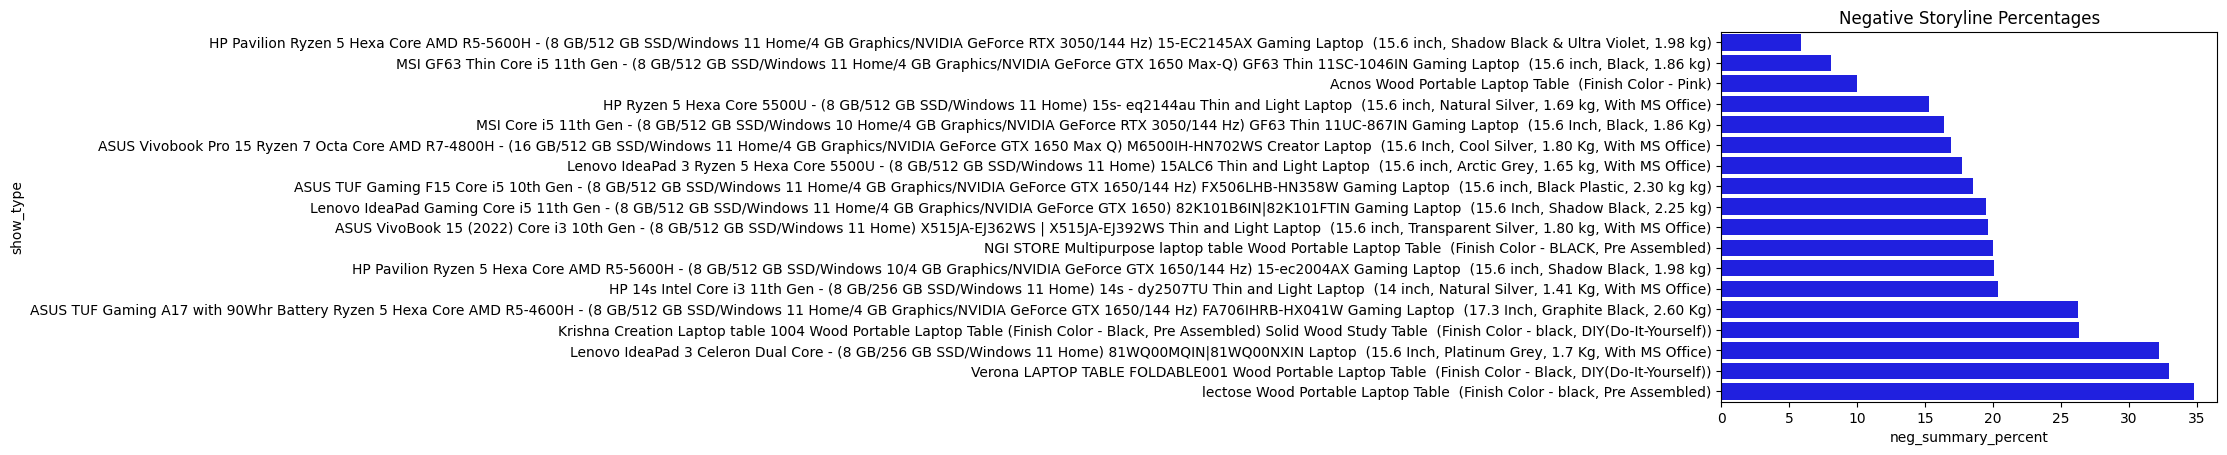

In [ ]:
sns.barplot( data = neg_summary_percent, x = '% negative summary', y=neg_summary_percent.index, color='blue') # Create a bar plot
# Add labels and title
plt.xlabel('neg_summary_percent')
plt.ylabel('show_type')
plt.title('Negative Storyline Percentages')

# Show the plot
plt.show()


In [ ]:
# Generate the word cloud

flipkart_e_commerce_review_list['processed_category_list'] = flipkart_e_commerce_review_list['Summary'].apply(preprocessed_text)


In [ ]:
# filtering the flipkart_e_commerce_review_list DataFrame to create a subset (flipkart_e_commerce_review_list_p_set)
# containing only movies with a positive compound sentiment score.
flipkart_e_commerce_review_list_p_set = flipkart_e_commerce_review_list[(flipkart_e_commerce_review_list['Rate'] == '5')
& (flipkart_e_commerce_review_list['compound']>0)]
#"flipkart_e_commerce_review_list_p_set" contains only those rows that meet both criteria.

# Display the first few rows of the subset
flipkart_e_commerce_review_list_p_set.head()


,Product_Name,Price,Rate,Review,Summary,compound,neg,neu,pos,processed_category_list
1,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,"Very nice laptop, Gaming experience is very go...",0.9061,0.000,0.737,0.263,"[nice, laptop, game, experi, good, build, qual..."
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Awesome,One of the best Laptop for Under 60KPerformanc...,0.6907,0.030,0.852,0.118,"[one, best, laptop, 60kperform, excel, find, l..."
6,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Excellent,Laptop is awesomevery smoothbattery performanc...,0.9553,0.000,0.791,0.209,"[laptop, awesomeveri, smoothbatteri, perform, ..."
7,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Highly recommended,A very good laptop overall for regular use. Th...,0.9622,0.000,0.792,0.208,"[good, laptop, overal, regular, use, design, b..."
8,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",5,Best in the market!,The laptop is pretty amazing in the price rang...,0.9246,0.054,0.759,0.186,"[laptop, pretti, amaz, price, rang, play, far,..."


In [ ]:
# filtering the flipkart_e_commerce_review_list DataFrame to create a subset (flipkart_e_commerce_review_list_n_set)
# containing only movies with a non-positive (less than or equal to 0) compound sentiment score.
flipkart_e_commerce_review_list_n_set = flipkart_e_commerce_review_list[(flipkart_e_commerce_review_list['Rate'] == '1')
& (flipkart_e_commerce_review_list['compound']<=0)]
#"flipkart_e_commerce_review_list_n_set" contains only those rows that meet both criteria.

# Display the first few rows of the subset
flipkart_e_commerce_review_list_n_set.head()

,Product_Name,Price,Rate,Review,Summary,compound,neg,neu,pos,processed_category_list
87,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",1,Absolute rubbish!,Such a bad experience with such a reputed comp...,-0.1779,0.065,0.878,0.057,"[bad, experi, reput, compani, like, asu, sever..."
94,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",1,Horrible,Not that much good as I expected,-0.3412,0.325,0.675,0.000,"[much, good, expect]"
98,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",1,Absolute rubbish!,Very bad experience passwords went wrong cant ...,-0.9283,0.461,0.539,0.000,"[bad, experi, password, went, wrong, cant, sig..."
101,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"63,990",1,Absolute rubbish!,Very bad experience passwords went wrong cant ...,-0.9283,0.461,0.539,0.000,"[bad, experi, password, went, wrong, cant, sig..."
191,MSI GF63 Thin Core i5 11th Gen - (8 GB/512 GB ...,"51,990",1,Absolute rubbish!,Battery problem,-0.4019,0.730,0.270,0.000,"[batteri, problem]"


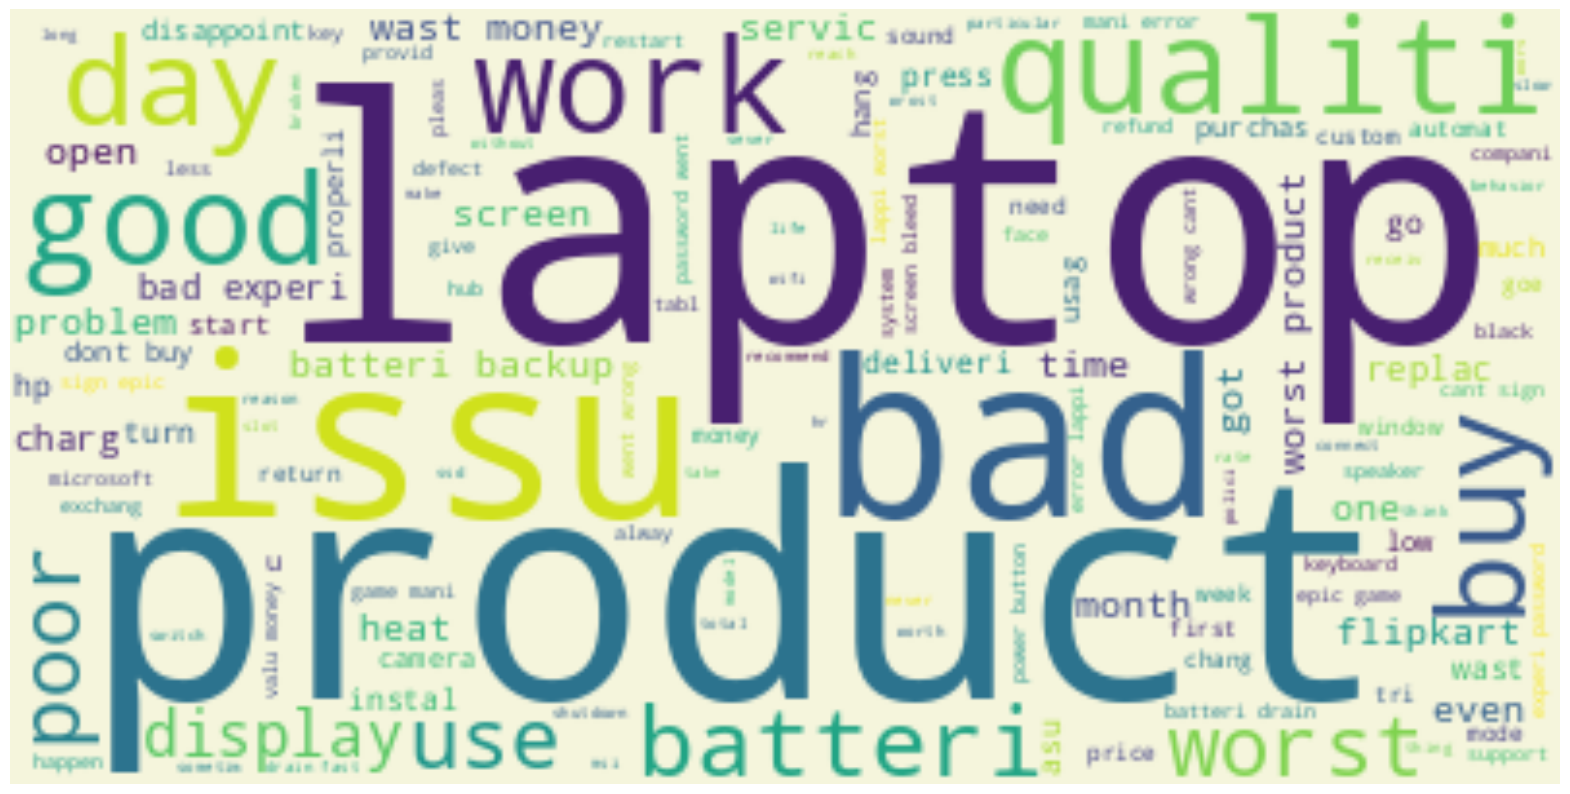

In [ ]:
# Concatenate all the words in the 'processed_category_list' column
negative_tokens = [word for Summary in flipkart_e_commerce_review_list_n_set['processed_category_list'] for word in Summary]

# Join the words into a single string with spaces
text = ' '.join(negative_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='beige').generate(text)

# Set the figure size
plt.figure(figsize=(20, 20))

# Display the WordCloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

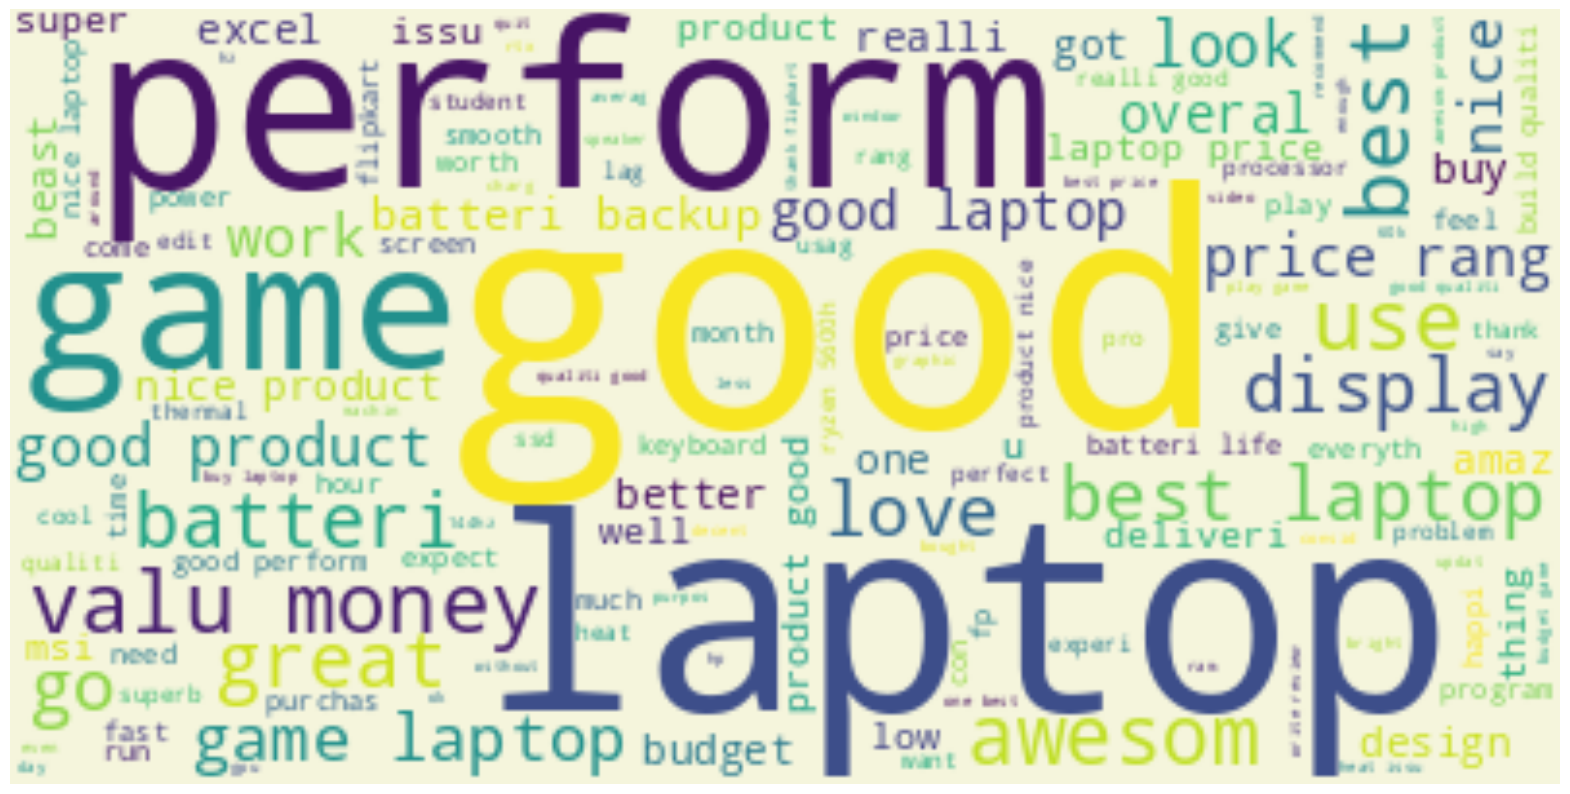

In [ ]:
# Concatenate all the words in the 'processed_category_list' column
positive_tokens = [word for Summary in flipkart_e_commerce_review_list_p_set['processed_category_list'] for word in Summary]

# Join the words into a single string with spaces
text = ' '.join(positive_tokens)

# Create a WordCloud object
wordcloud = WordCloud(background_color='beige').generate(text)

# Set the figure size
plt.figure(figsize=(20, 20))

# Display the WordCloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.probability import FreqDist #class from nltk to compute the frequency distribution of tokens in positive_tokens.

# Create a frequency distribution of positive_tokens
positive_freqdist = FreqDist(positive_tokens)

# Display the top 20 most frequent tokens
positive_freqdist.tabulate(20)

 laptop    good product    game    best perform batteri   price    nice   money    valu     use  awesom qualiti       5    rang   great      go    also display 
    836     768     387     372     364     364     286     265     242     198     183     182     173     166     165     141     140     136     135     135 


In [ ]:
from nltk.probability import FreqDist #class from NLTK to compute the frequency distribution of tokens in negative_tokens.

# Create a frequency distribution of negative_tokens
negative_freqdist = FreqDist(negative_tokens)

# Display the top 20 most frequent tokens
negative_freqdist.tabulate(20)

product  laptop batteri     bad   worst    issu     buy qualiti    work    good     day   money    wast    poor     use  screen  backup display    open    heat 
     49      46      37      34      31      27      27      25      25      23      22      22      20      16      16      13      13      13      12      12 


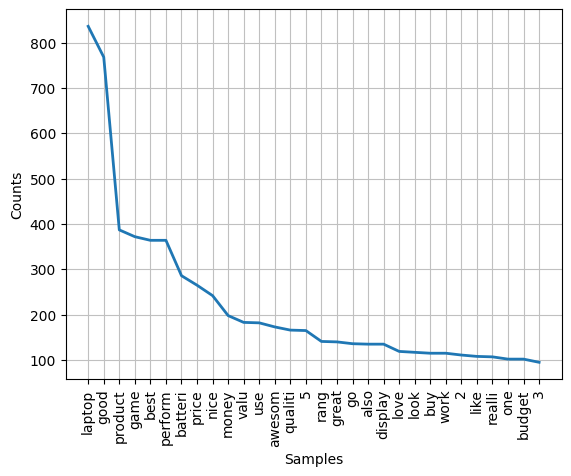

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Plot the top 30 most frequent positive tokens
positive_freqdist.plot(30)

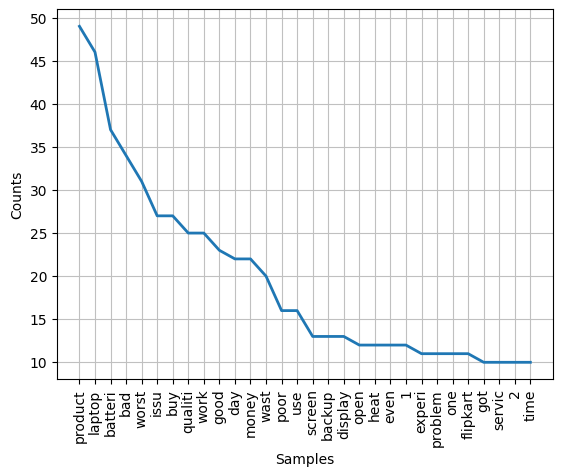

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Plot the top 30 most frequent negative tokens
negative_freqdist.plot(30)